## GTECH 731 - Lab 8
## Griztko Erickson

Importing Packages

In [31]:
import pandas as pd
import geopandas as gpd
import json
import io

## Loading in and Sorting Data 
Task 3 of merging state names is done here, first, for organization

Loading in County Data. Help received from TangoYankee (https://github.com/TangoYankee) in overcoming data loading issues.

In [32]:
with io.open(r"C:\Users\grizt\Documents\GTECH731\Session 8\gz_2010_us_050_00_20m.json", encoding="latin-1") as f:
    data = json.load(f)

with open(r"C:\Users\grizt\Documents\GTECH731\Session 8\gz_2010_us_050_00_20m.json", "w") as fp:
    json.dump(data, fp)
   
US_Counties = gpd.read_file(r"C:\Users\grizt\Documents\GTECH731\Session 8\gz_2010_us_050_00_20m.json")


Loading in State Names 

In [33]:
with io.open(r"C:\Users\grizt\Documents\GTECH731\Session 8\fipsToState.json") as f:
    fips_to_state = json.load(f)
    
with io.open(r"C:\Users\grizt\Documents\GTECH731\Session 8\fipsToState.json") as f:
    state_code_to_fips = json.load(f)
    
States = pd.DataFrame({"STATE": fips_to_state.keys(), "STATE_NAME": fips_to_state.values(),})

Merging State Names with County Data

In [34]:
US = pd.merge(US_Counties, States, how="left", on="STATE")
US.head(11)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,STATE_NAME
0,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",Alabama
1,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",Alabama
2,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",Alabama
3,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",Alabama
4,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",Alabama
5,0500000US01045,01,045,Dale,County,561.150,"POLYGON ((-85.41644 31.61947, -85.41743 31.314...",Alabama
6,0500000US01051,01,051,Elmore,County,618.485,"POLYGON ((-86.33678 32.76747, -86.31948 32.753...",Alabama
7,0500000US01065,01,065,Hale,County,643.943,"POLYGON ((-87.42120 32.87451, -87.47217 32.830...",Alabama
8,0500000US01079,01,079,Lawrence,County,690.678,"POLYGON ((-87.10507 34.68604, -87.10591 34.587...",Alabama
9,0500000US01083,01,083,Limestone,County,559.936,"POLYGON ((-86.83631 34.99176, -86.82066 34.991...",Alabama


## Task 1
n m most common county names

In [35]:
def get_most_common(n):
    return US.groupby("NAME").size().nlargest(n)

In [36]:
get_most_common(3)

NAME
Washington    31
Franklin      26
Jefferson     26
dtype: int64

In [37]:
get_most_common(5)

NAME
Washington    31
Franklin      26
Jefferson     26
Jackson       24
Lincoln       24
dtype: int64

In [38]:
get_most_common(10)

NAME
Washington    31
Franklin      26
Jefferson     26
Jackson       24
Lincoln       24
Madison       20
Clay          18
Montgomery    18
Union         18
Marion        17
dtype: int64

## Task 2
County Summary Statistics

Total Number of counties

In [39]:
US.count() 

GEO_ID        3221
STATE         3221
COUNTY        3221
NAME          3221
LSAD          3221
CENSUSAREA    3221
geometry      3221
STATE_NAME    3143
dtype: int64

Max County Area by State

In [40]:
Max_States = US.groupby("STATE_NAME").max()
Max_States.head(6)

C:\Users\grizt\AppData\Local\Temp\ipykernel_7152\3712983641.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  Max_States = US.groupby("STATE_NAME").max()


,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA
STATE_NAME,,,,,,
Alabama,0500000US01133,01,133,Winston,County,1589.784
Alaska,0500000US02290,02,290,Yukon-Koyukuk,Muny,145504.789
Arizona,0500000US04027,04,027,Yuma,County,18618.885
Arkansas,0500000US05149,05,149,Yell,County,1039.214
California,0500000US06115,06,115,Yuba,County,20056.938
Colorado,0500000US08125,08,125,Yuma,County,4772.672


Min County Area by State

In [41]:
Min_States = US.groupby("STATE_NAME").min()
Min_States.head(6)

C:\Users\grizt\AppData\Local\Temp\ipykernel_7152\2484677849.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  Min_States = US.groupby("STATE_NAME").min()


,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA
STATE_NAME,,,,,,
Alabama,0500000US01001,01,001,Autauga,County,534.991
Alaska,0500000US02013,02,013,Aleutians East,Borough,452.325
Arizona,0500000US04001,04,001,Apache,County,1236.916
Arkansas,0500000US05001,05,001,Arkansas,County,528.268
California,0500000US06001,06,001,Alameda,County,46.873
Colorado,0500000US08001,08,001,Adams,County,33.034


Number of Counties in Each State

In [63]:
County_No = US.groupby("STATE_NAME").count()
County_No.head(6)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
STATE_NAME,,,,,,,
Alabama,67,67,67,67,67,67,67
Alaska,29,29,29,29,29,29,29
Arizona,15,15,15,15,15,15,15
Arkansas,75,75,75,75,75,75,75
California,58,58,58,58,58,58,58
Colorado,64,64,64,64,64,64,64


Average County Size by State

In [64]:
Avg_States = US.groupby("STATE_NAME").mean()
Avg_States.head(6)

C:\Users\grizt\AppData\Local\Temp\ipykernel_7152\2204982498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Avg_States = US.groupby("STATE_NAME").mean()


,CENSUSAREA
STATE_NAME,
Alabama,755.900373
Alaska,19677.274172
Arizona,7572.939000
Arkansas,693.806373
California,2685.848586
Colorado,1619.404500


## Task 4
Plotting Most Common Counties

<AxesSubplot: >

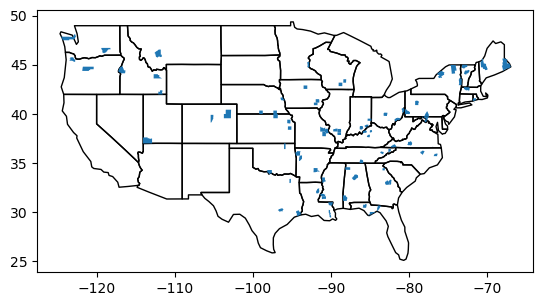

In [65]:
USA = r"C:\Users\grizt\Documents\GTECH731\Session 8\Contigous.geojson"
Contiguous = gpd.read_file(USA)

Common_Counties = US.loc[US['NAME'].isin(["Franklin","Jefferson","Washington"])]

Contiguous = Contiguous.to_crs(Common_Counties.crs)
ax = Common_Counties.plot(zorder=2)
Contiguous.plot(ax=ax, facecolor="none", edgecolor='black')